In [45]:
import numpy as np
import matplotlib.pyplot as plt

# reg = np.load('reg_lf.npz', allow_pickle=True)
# reg = np.load('reg_long_lf.npz', allow_pickle=True)
reg = np.load('reg2_lf.npz', allow_pickle=True)
sf = np.load('sf_lf.npz', allow_pickle=True)
qu = np.load('qui_lf.npz', allow_pickle=True)

### Luminosity Function

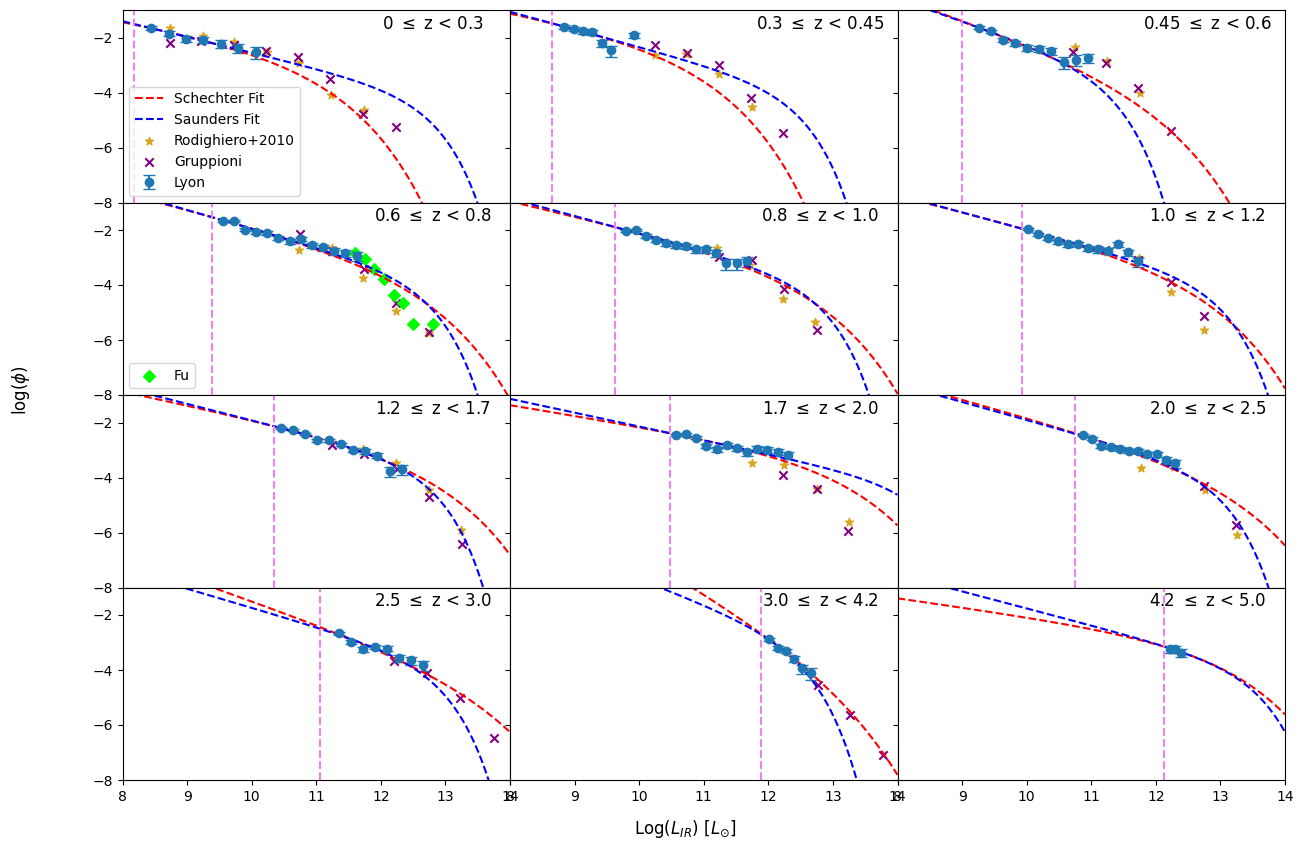

In [46]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

def schechter_luminosity(L, L_star, phi_star, alpha):
    return phi_star * 10 ** (-0.4*(1-alpha)*(L_star-L)) * np.exp(-10.**(-0.4*(L_star-L)))

def saunders_luminosity(L, L_star, phi_star, alpha, sigma):
    return phi_star * 10 ** (-0.4*(1-alpha)*(L_star-L)) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + 10 ** (-0.4 * (L_star-L))))**2)

def plot_lf(redshift_bins, lum_centers, phi, phi_e, min_ls, schech_params, saunder_params, axes, label):
    for i, ((z_start, z_end), lum, p, e, ax, min_l, sch_param, sau_param) in enumerate(zip(redshift_bins, lum_centers, phi, phi_e, axes, min_ls, schech_params, saunder_params)):
        try:
            yerr = [np.log10(p) - np.log10(p - e), np.log10(p + e) - np.log10(p)]
        except TypeError:
            continue
        ax.errorbar(lum, np.log10(p), yerr=yerr, label=label if i == 0 else "", fmt='o', capsize=4)
        
        if len(sch_param) != 0:
            l = np.linspace(8, 14, 100)
            ax.plot(l, np.log10(schechter_luminosity(l, *sch_param)), label='Schechter Fit' if i == 0 else "", color='red', linestyle='--')
            
        if len(sau_param) != 0:
            l = np.linspace(8, 14, 100)
            ax.plot(l, np.log10(saunders_luminosity(l, *sau_param)), label='Saunders Fit' if i == 0 else "", color='blue', linestyle='--')
        
        ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.8)
        ax.axvline(np.log10(min_l), color='violet', linestyle='--') # , label=f'L < {round(np.log10(min_l), 2)}'
        ax.set_xlim(8, 14)
        ax.set_ylim(-8, -1)
        # ax.legend()

plot_lf(reg['z'], reg['x'], reg['y'], reg['e'], reg['m'], reg['schech_p'], reg['saunder_p'], axes, label='Lyon')
# plot_lf(sf['z'], sf['x'], sf['y'], sf['e'], axes, label='Star-forming')
# plot_lf(qu['z'], qu['x'], qu['y'], qu['e'], axes, label='Quiescent')




# Rodighiero 0 < z < 0.3
axes[0].scatter(x=[11.74, 11.23, 10.73, 10.23, 9.73, 9.24, 8.73 ], y=[-4.63, -4.09, -2.92, -2.52, -2.17, -1.96, -1.67], label='Rodighiero+2010', color='goldenrod', marker='*')

# Rodighiero 0.3 < z < 0.45
axes[1].scatter(x=[11.75, 11.24, 10.73, 10.25 ], y=[-4.51, -3.34, -2.59, -2.65], label='Rodighiero', color='goldenrod', marker='*')

# Rodighiero 0.45 < z < 0.6
axes[2].scatter(x=[11.75, 11.24, 10.75], y=[-4.03, -2.84, -2.33], label='Rodighiero', color='goldenrod', marker='*')

# Rodighiero 0.6 < z < 0.8
axes[3].scatter(x=[12.74, 12.24, 11.73, 11.24, 10.74], y=[-5.73, -4.95, -3.76, -2.66, -2.74], color='goldenrod', marker='*')

# Rodighiero 0.8 < z < 1.0
axes[4].scatter(x=[12.73, 12.23, 11.72, 11.21], y=[-5.36, -4.52, -3.26, -2.65], label='Rodighiero', color='goldenrod', marker='*')

# Rodighiero 1.0 < z < 1.2
axes[5].scatter(x=[12.74, 12.24, 11.74, 11.24], y=[-5.63, -4.24, -3.00, -2.81], label='Rodighiero', color='goldenrod', marker='*')

# Rodighiero 1.2 < z < 1.7
axes[6].scatter(x=[13.24, 12.74, 12.23, 11.72], y=[-5.90, -4.47, -3.46, -2.96], label='Rodighiero', color='goldenrod', marker='*')

# Rodighiero 1.7 < z < 2
axes[7].scatter(x=[13.25, 12.75, 12.24, 11.75], y=[-5.63, -4.42, -3.54, -3.46], label='Rodighiero', color='goldenrod', marker='*')

# Rodighiero 2 < z < 2.5
axes[8].scatter(x=[13.26, 12.76, 12.28, 11.77], y=[-6.09, -4.45, -3.60, -3.65], label='Rodighiero', color='goldenrod', marker='*')



# Gruppioni 0.0 < z < 0.3
axes[0].scatter(x=[12.24, 11.73, 11.22, 10.719, 10.22, 9.72, 9.22, 8.73], y=[-5.26, -4.77, -3.51, -2.72, -2.50, -2.28, -2.12, -2.21], label='Gruppioni', color='purple', marker='x')

# Gruppioni 0.3 < z < 0.45
axes[1].scatter(x=[12.23, 11.73, 11.24, 10.74, 10.24], y=[-5.49, -4.21, -3.00, -2.55, -2.28], label='Gruppioni', color='purple', marker='x')

# Gruppioni 0.45 < z < 0.6
axes[2].scatter(x=[12.23, 11.73, 11.23, 10.72], y=[-5.41, -3.85, -2.91, -2.53], label='Gruppioni', color='purple', marker='x')

# Gruppioni 0.6 < z < 0.8
axes[3].scatter(x=[12.74, 12.24, 11.74, 11.24, 10.75], y=[-5.70, -4.67, -3.40, -2.76, -2.14],  color='purple', marker='x')

# Gruppioni 0.8 < z < 10
axes[4].scatter(x=[12.75, 12.24, 11.75, 11.24], y=[-5.62, -4.16, -3.10, -2.98], label='Gruppioni', color='purple', marker='x')

# Gruppioni 1.0 < z < 1.2
axes[5].scatter(x=[12.74, 12.23, 11.73, 11.21], y=[-5.11, -3.88, -3.08, -2.72], label='Gruppioni', color='purple', marker='x')

# Gruppioni 1.2 < z < 1.7
axes[6].scatter(x=[13.26, 12.74, 12.25, 11.74, 11.25], y=[-6.40, -4.72, -3.70, -3.15, -2.80], label='Gruppioni', color='purple', marker='x')

# Gruppioni 1.7 < z < 2
axes[7].scatter(x=[13.23, 12.75, 12.23], y=[-5.95, -4.40, -3.91], label='Gruppioni', color='purple', marker='x')

# Gruppioni 2 < z < 2.5
axes[8].scatter(x=[13.24, 12.75, 12.24], y=[-5.71, -4.31, -3.47], label='Gruppioni', color='purple', marker='x')

# Gruppioni 2.5 < z < 3
axes[9].scatter(x=[13.75, 13.23, 12.72, 12.21], y=[-6.46, -5.03, -4.11, -3.66], label='Gruppioni', color='purple', marker='x')

# Gruppioni 3 < z < 4.2
axes[10].scatter(x=[12.77, 13.27, 13.78], y=[-4.55, -5.64, -7.09], label='Gruppioni', color='purple', marker='x')



# Fu 0.6 < z < 0.8
axes[3].scatter(x=[12.80, 12.50, 12.35, 12.20, 12.05, 11.90, 11.75, 11.60], y=[-5.43, -5.43, -4.65, -4.36, -3.78, -3.43, -3.07, -2.83], label='Fu', marker='D', color='lime')



axes[0].legend(loc='lower left')
axes[3].legend(loc='lower left')
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0.05)
fig.supylabel('log($\phi$)', x=0.05)
plt.subplots_adjust(hspace=0, wspace=0)